In [69]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

In [70]:
df1 = pd.read_csv("/Users/erfanwarlock/Documents/ML Playground/HousingPrices/train.csv")
df = df1.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [72]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Check and Handle missing values 

In [73]:
## Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

EDA and plots

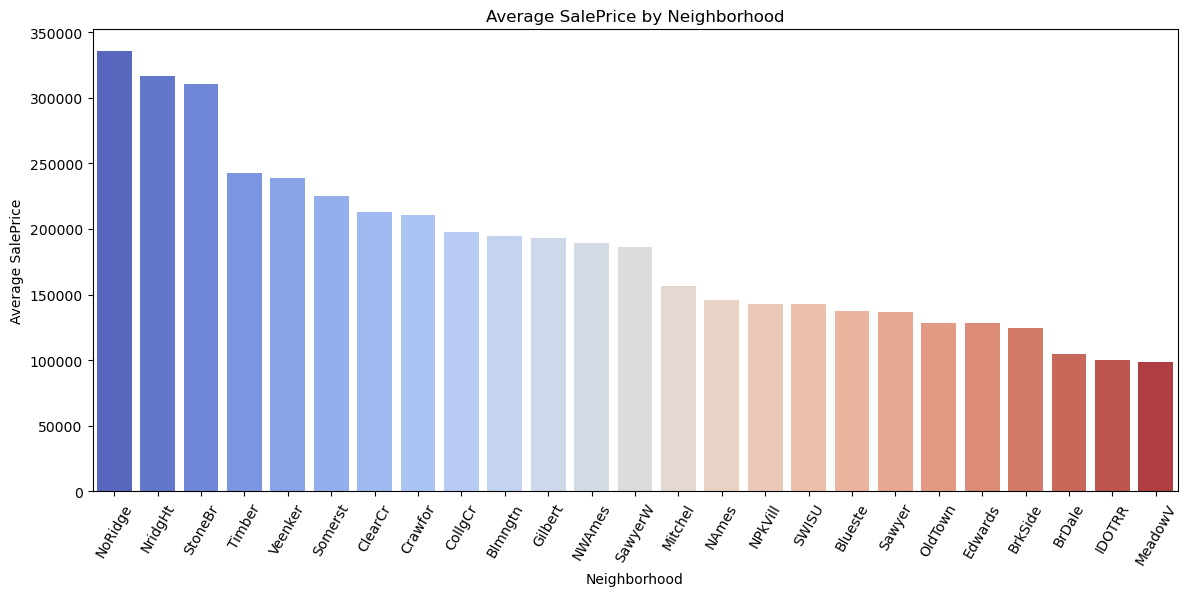

In [74]:
# Visualize the sale price distribution based on neighborhood
plt.figure(figsize=(14,6))
neighbor_prices = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)
sns.barplot(x=neighbor_prices.index, y=neighbor_prices.values, palette='coolwarm')
plt.xticks(rotation=60)
plt.title("Average SalePrice by Neighborhood")
plt.ylabel("Average SalePrice")
plt.show()

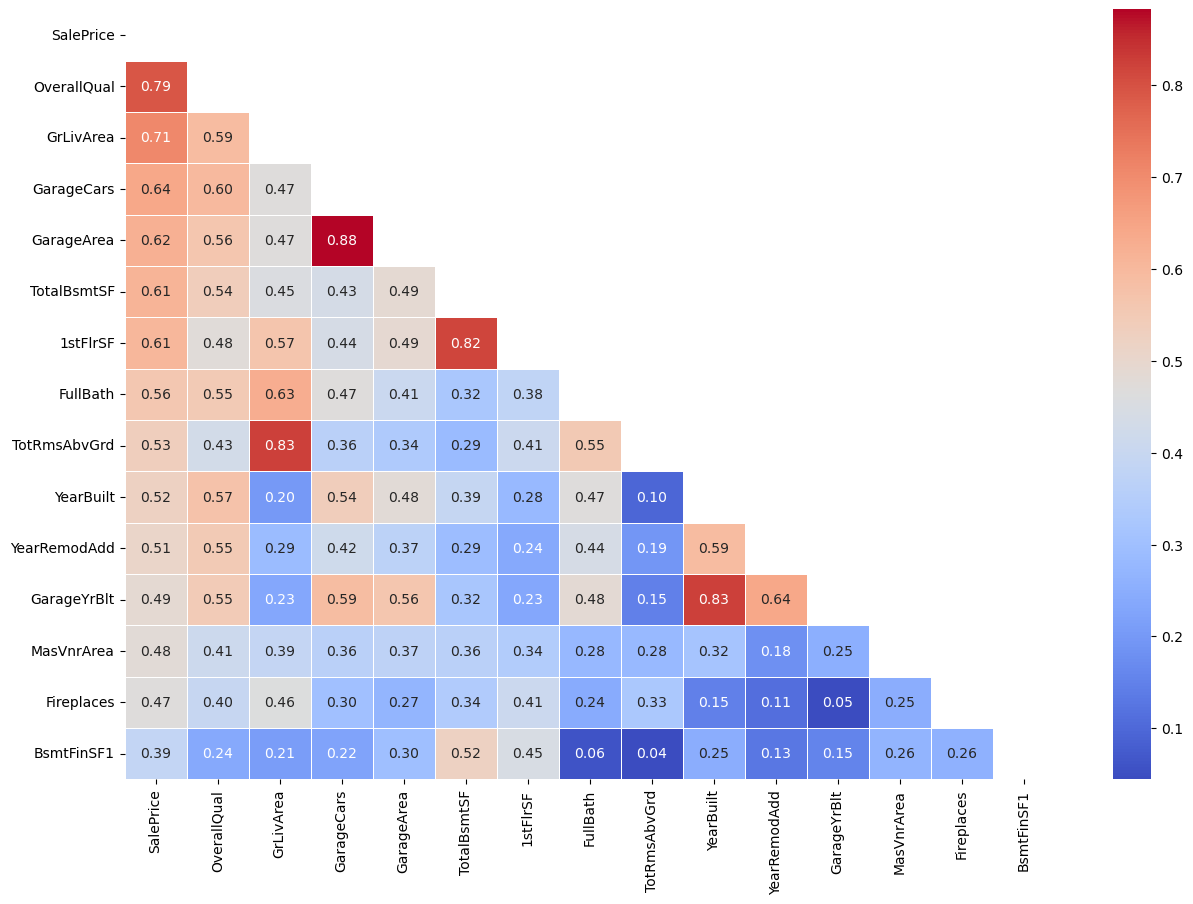

In [75]:
df_num=df.select_dtypes(include=['int64', 'float64'])
corr=df_num.corr()

#Top 15 features correlated with SalePrice
top_features=corr['SalePrice'].sort_values(ascending=False).head(15)

mask=np.triu(np.ones_like(df[top_features.index].corr(), dtype=bool))

plt.figure(figsize=(15, 10))
sns.heatmap(df[top_features.index].corr(), mask=mask, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')
plt.show()

Righ away we find out dominating factors in pricing patterns are "overall quality" and "ground living area". 
Multicollinearity issues are revealed as follows: 
-GarageCars and GarageArea (r=0.88) both capture garage size
-TotalBsmtSF and 1stFlrSF (r=0.82) both measure basement/ground floor area
-GrLivArea and TotRmsAbvGrd (r=0.83) both represent living space

To avoid the issues associated with redundancy, we will later drop "GarageArea", "1stFlrSF", "TotRmsAbvGrd", and 'GarageYrBlt'.

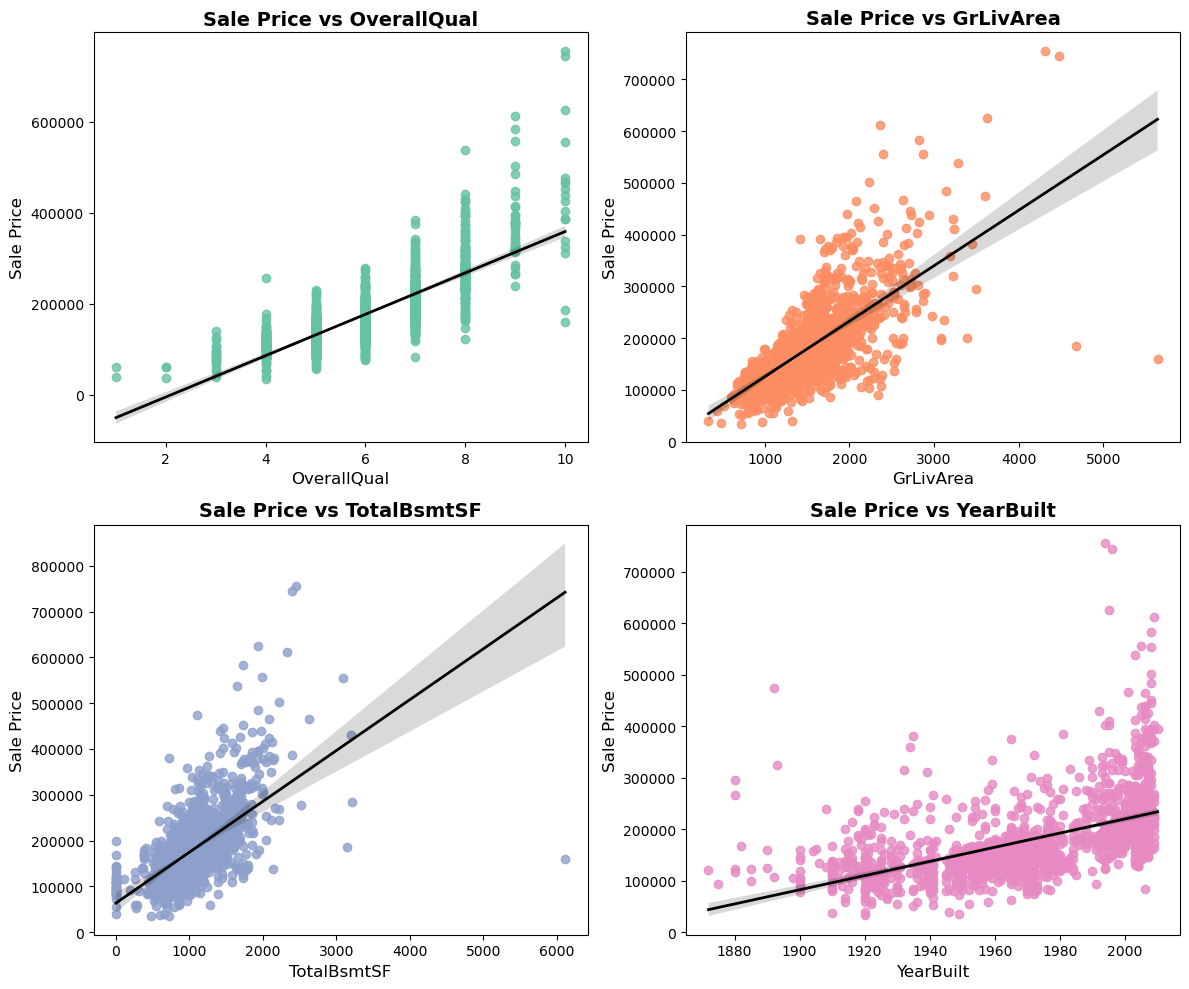

In [76]:
# Visualize scatter plots of the top predictors against sale prices

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

key_vars = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']
palette = sns.color_palette("Set2", n_colors=len(key_vars))

for idx, var in enumerate(key_vars):
    sns.regplot(
        x=var, y='SalePrice',
        data=df,
        ax=axes[idx],
        color=palette[idx],         
        line_kws={'color': 'black', 'lw': 2}  
    )
    axes[idx].set_title(f'Sale Price vs {var}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(var, fontsize=12)
    axes[idx].set_ylabel('Sale Price', fontsize=12)

plt.tight_layout()
plt.show()    

Modeling

In [77]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Feature Engineering

for df in [train, test]:
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']
    df['TotalBathrooms'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']
    df['IsRemodeled'] = (df['YearRemodAdd'] != df['YearBuilt']).astype(int)
    df['QualityxSize'] = (df['OverallQual'] * df['GrLivArea']) / 1000

# Drop the target variable and redundant features that we identified earlier
X = train.drop(columns=['GarageArea', '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'SalePrice', 'Id'])
y = np.log(train['SalePrice'])  # FIXED: was df['SalePrice']
X_test = test.drop(columns=['GarageArea', '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'Id'])

# Distinguish numeric and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Handle missing values in training and test sets
X[num_cols] = X[num_cols].fillna(X[num_cols].median())
X[cat_cols] = X[cat_cols].fillna('EMPTY')

X_test[num_cols] = X_test[num_cols].fillna(X_test[num_cols].median())
X_test[cat_cols] = X_test[cat_cols].fillna('EMPTY')

preprocessor = ColumnTransformer([
    ('num', RobustScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Define models, hyperparameter optimization and training

models = {
    'linreg': LinearRegression(),
    'rfreg': RandomForestRegressor(random_state=42),
    'gbreg': GradientBoostingRegressor(random_state=42),
    'xgb': xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
}

param_grids = {
    'linreg': {},
    'rfreg': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20]
    },
    'gbreg': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.05],
        'model__max_depth': [3, 5]
    },
    'xgb': {
        'model__n_estimators': [300, 500, 800],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 5, 7]
    }
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, model in models.items():
    print(f"\n Training {name.upper()}...")

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        cv=cv,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X, y)

    results[name] = grid_search.best_estimator_
    print(f"{name} best R²: {grid_search.best_score_:.4f}")
    print(f"Best params: {grid_search.best_params_}")


 Training LINREG...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
linreg best R²: 0.8367
Best params: {}

 Training RFREG...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
rfreg best R²: 0.8740
Best params: {'model__max_depth': 20, 'model__n_estimators': 200}

 Training GBREG...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
gbreg best R²: 0.8851
Best params: {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 200}

 Training XGB...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
xgb best R²: 0.8925
Best params: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 800}
